 # Movie Revenue Prediction

### Project overview
The client is a movie studio and they need to be able to predict movie revenue in order to greenlight the project and assign a budget to it. Most of the data is comprised of categorical variables. While the budget for the movie is known in the dataset it is often an unknown variable during the greenlighting process. 

### Prediction Basis

Since predicting a movie's revenue in itself is a challenge, additionally the budget amount remains elusive makes it a difficult business problem as there is no base-line to establish the prediction.


# I- Executive Summary

Analyze available data to predict a movie revenue and finally assign a budget during green-lighting process.

# II- Business Understanding

### Define Organization  

Client is a movie studio in the business of producing, sponsoring and financing movies.



###  Intended Stakeholders of Data  

Movie producers, finance & budget managers.

###  Define Business Objectives   

based on the input parameters, a movie's revenue is to be predicted.

###  Background   

### Business Objectives   

•	Which variables can help in predicting revenue figures?
•	determine which parameters had the most effect on a movie revenue?
•	Limiting the problem to predicting just the revenue amounts.
•	Evaluate and cross-validate the revenue figures.

### Business Success Criteria  

Predicting the movie revenue as accurately as possible, and making the **REVENUE** as the **TARGET VARIABLE** or **OUTCOME**. Since the revenue is a whole-number, a Regression will be developed.

### Assumptions, and Constraints   

Assumptions: data is accurate and reliable.

### Terminology  - Code book - Data Dictionary 

A lead is a person who has indicated interest in your company's product or service in some way, shape, or form.

- title	- title of the movie
- tagline - few words for movie presentation	
- revenue - revenue generated by the movie	
- budget - planned expenditure	
- genres - categorical group of the movie
- homepage - movie promotional website
- id - movie id
- keywords - tags associated with the movie
- original_language	- original movie language 
- overview - movie synopsis
- production_companies	- sponsoring and producing comapnies
- production_countries	- locations of the movie made
- release_date	- movie available for viewing date.
- runtime	- movie duration
- spoken_languages	- spoken languages in the movie
- status - movie status for viewing


### Project Plan   

gets updated as per the succeding stages.

modelling planned to use: Multiple Linear Regression,  SVM, 

# III- Data Understanding

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 12, 4
%matplotlib inline

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities

import scipy

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import metrics   # some sklearn eval functions

#import xgboost as xgb

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Run multiple commands and get multiple outputs within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Collect Initial Data   

In [3]:
# Load CSV Using Python Standard Library
mv = pd.read_csv('1-MovieRevenue-WorkBook.csv')

mv.head()

,title,tagline,genres,homepage,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,budget,revenue
0,Avatar,Enter the World of Pandora.,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,237000000,2787965087
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,300000000,961000000
2,Spectre,A Plan No One Escapes,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,245000000,880674609
3,The Dark Knight Rises,The Legend Ends,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,250000000,1084939099
4,John Carter,"Lost in our world, found in another.","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,260000000,284139100


In [5]:
mv.columns

Index(['title', 'tagline', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'overview', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'budget', 'revenue'],
      dtype='object')

In [57]:
# Drop columns that are not required
mv = mv.drop(['title', 'tagline', 'homepage', 'id', 'keywords', 'overview', 'spoken_languages',
         'status', 'production_companies','production_countries'], axis=1)

Since some columns are in key:value pairs, converting these and keeping only the values.

In [58]:
mv['genres'] = mv['genres'].str.extract('([A-Z]\w{0,})', expand=True )

mv

,genres,original_language,release_date,runtime,budget,revenue
0,Action,en,12/10/2009,162.0,237000000,2787965087
1,Adventure,en,5/19/2007,169.0,300000000,961000000
2,Action,en,10/26/2015,148.0,245000000,880674609
3,Action,en,7/16/2012,165.0,250000000,1084939099
4,Action,en,3/7/2012,132.0,260000000,284139100
5,Fantasy,en,5/1/2007,139.0,258000000,890871626
6,Animation,en,11/24/2010,100.0,260000000,591794936
7,Action,en,4/22/2015,141.0,280000000,1405403694
8,Adventure,en,7/7/2009,153.0,250000000,933959197
9,Action,en,3/23/2016,151.0,250000000,873260194


In [9]:
mv.shape

mv.head()

(4803, 6)

,genres,original_language,release_date,runtime,budget,revenue
0,Action,en,12/10/2009,162.0,237000000,2787965087
1,Adventure,en,5/19/2007,169.0,300000000,961000000
2,Action,en,10/26/2015,148.0,245000000,880674609
3,Action,en,7/16/2012,165.0,250000000,1084939099
4,Action,en,3/7/2012,132.0,260000000,284139100


### Initial Data Collection Report   

####   Describing Data at High Level   

In [10]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
genres               4775 non-null object
original_language    4803 non-null object
release_date         4802 non-null object
runtime              4801 non-null float64
budget               4803 non-null int64
revenue              4803 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 168.9+ KB


In [11]:
# Statistical Summary
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = mv.describe()
description

,runtime,budget,revenue
count,4801.000,4.803e+03,4.803e+03
mean,106.876,2.905e+07,8.226e+07
std,22.612,4.072e+07,1.629e+08
min,0.000,0.000e+00,0.000e+00
25%,94.000,7.900e+05,0.000e+00
50%,103.000,1.500e+07,1.917e+07
75%,118.000,4.000e+07,9.292e+07
max,338.000,3.800e+08,2.788e+09


In [12]:
# exporting the data to a backup csv file

mv.to_csv('MovieRevenue-Flattned.csv', sep= ',', encoding='utf8', index=False)

In [13]:
# Calculating file size in MB
import os

# PROMO File size in MB
mvMemBytes = os.path.getsize('MovieRevenue-Flattned.csv')
mvDataMB = round(mvMemBytes/1048576, 2)

print("Movie review File size in MB:", mvDataMB, 'MB')

Movie review File size in MB: 0.19 MB


In [17]:
mv.columns

Index(['genres', 'original_language', 'release_date', 'runtime', 'budget', 'revenue'], dtype='object')

In [19]:
# Class Distribution
class_counts = mv.groupby('genres').size()
class_counts

genres
Action          754
Adventure       339
Animation       123
Comedy         1042
Crime           195
Documentary      89
Drama          1207
Family           56
Fantasy         117
Foreign           2
History          25
Horror          300
Music            34
Mystery          41
Romance         106
Science          96
TV                4
Thriller        194
War              24
Western          27
dtype: int64

In [21]:
mv.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science', 'Drama',
       'Thriller', 'Family', 'Comedy', 'History', 'War', 'Western',
       'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary', 'Music',
       'TV', nan, 'Foreign'], dtype=object)

In [20]:
# Class Distributions genres
class_counts = mv.groupby('original_language').size()
class_counts

original_language
af       1
ar       2
cn      12
cs       2
da       7
de      27
el       1
en    4505
es      32
fa       4
fr      70
he       3
hi      19
hu       1
id       2
is       1
it      14
ja      16
ko      11
ky       1
nb       1
nl       4
no       1
pl       1
ps       1
pt       9
ro       2
ru      11
sl       1
sv       5
ta       2
te       1
th       3
tr       1
vi       1
xx       1
zh      27
dtype: int64

In [22]:
mv.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

There are 18 unique genres.

In [26]:
class_counts = mv.groupby('release_date').size()
class_counts

release_date
1/1/1961    1
1/1/1964    1
1/1/1969    1
1/1/1970    1
1/1/1971    2
           ..
9/9/2010    2
9/9/2011    5
9/9/2012    1
9/9/2015    2
9/9/2016    2
Length: 3280, dtype: int64

In [27]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
genres               4775 non-null object
original_language    4803 non-null object
release_date         4802 non-null object
runtime              4801 non-null float64
budget               4803 non-null int64
revenue              4803 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 168.9+ KB


- data frame mv has 4803 rows and 6 columnms
- we have some missing data in columns: genres, release date and runtime. The missing values will be handled later as needed.
- data types: float, int and object

###  Data Description Report  

Issues found:

##  Exploratory Data  Analysis

This section handles the graphs and plots for data exploration. 

checking for outliers & anamolies in runtime, budget and revenue

**- Univariate visualization**

Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.<br>

**- Quantitative features**  <br>

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement. <br>
  **- Histograms and density plots**

The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method hist().

runtime       AxesSubplot(0.125,0.125;0.227941x0.755)
budget     AxesSubplot(0.398529,0.125;0.227941x0.755)
revenue    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

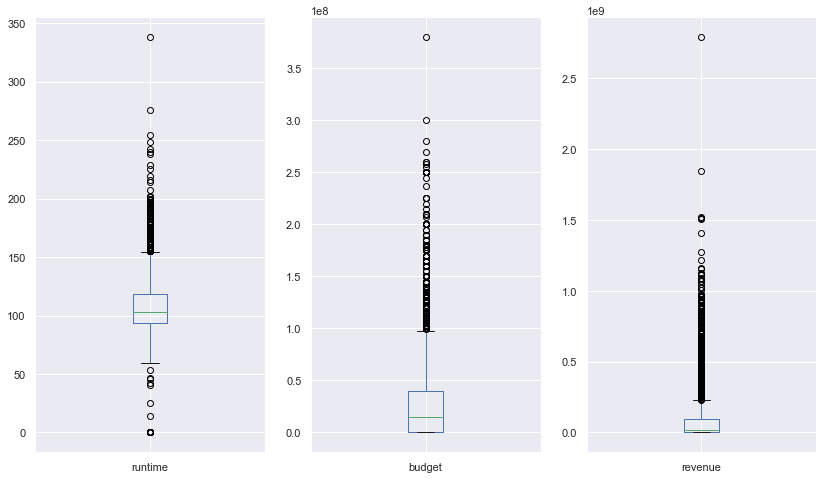

In [44]:
# Box and Whisker Plots
plt.rcParams['figure.figsize'] = 14,8

mv.plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AD7A210>,
      dtype=object)

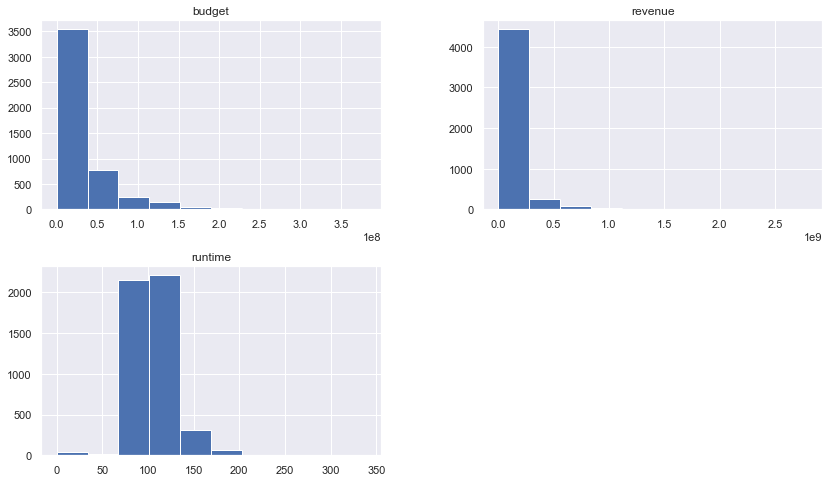

In [45]:
 plt.rcParams['figure.figsize'] = 14,8  # set display size

features = ['revenue', 'budget', 'runtime']

mv[features].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0BD4A210>,
      dtype=object)

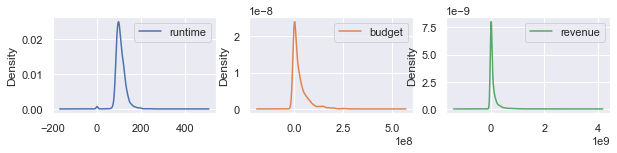

In [46]:
# Univariate Density Plots
plt.rcParams['figure.figsize'] = 10,6 
mv.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

#### Analysis
the above plots show that the variables contain outliers, with distribution as positively skewed and a thin kurtosis. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0BD4A7B0>,
      dtype=object)

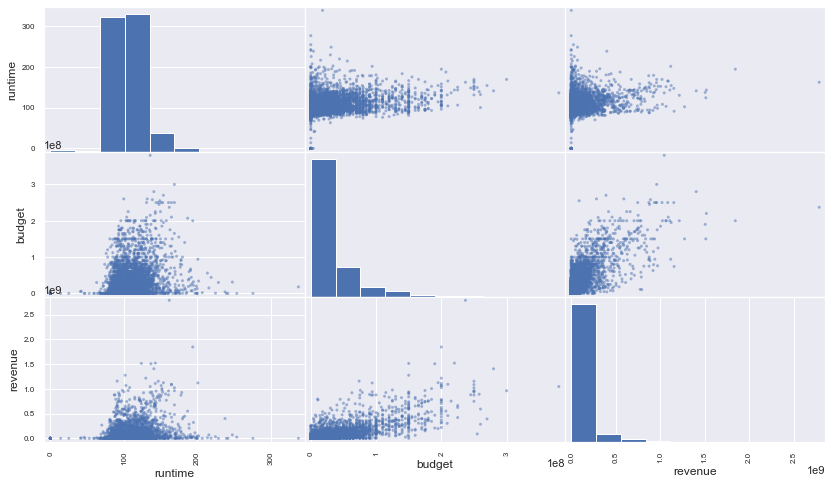

In [47]:
# Scatter matrix
plt.rcParams['figure.figsize'] = 14,8
pd.plotting.scatter_matrix(mv)
plt.show()

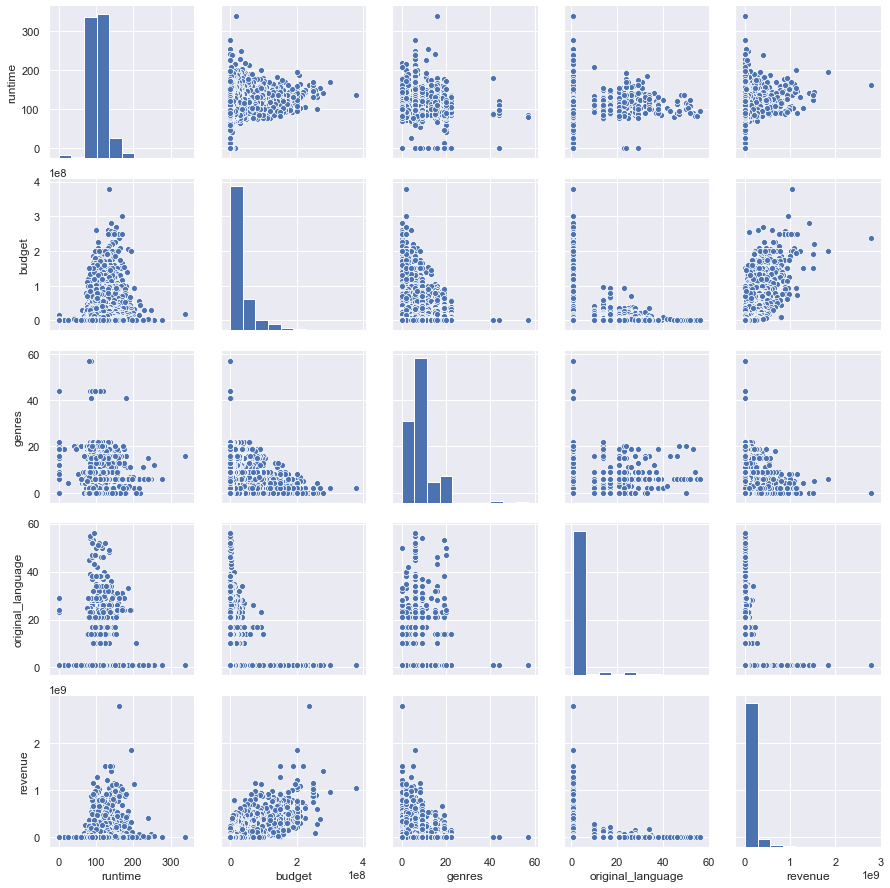

In [166]:
# Scatterplot Matrix
sns.pairplot(mv3)
plt.show()

In [59]:
# Skewness value
mv.skew()

runtime    0.716
budget     2.437
revenue    4.445
dtype: float64

In [52]:
mv.describe()

,runtime,budget,revenue
count,4801.000,4.803e+03,4.803e+03
mean,106.876,2.905e+07,8.226e+07
std,22.612,4.072e+07,1.629e+08
min,0.000,0.000e+00,0.000e+00
25%,94.000,7.900e+05,0.000e+00
50%,103.000,1.500e+07,1.917e+07
75%,118.000,4.000e+07,9.292e+07
max,338.000,3.800e+08,2.788e+09


Handling missing values, outliers and anomalies, distribution issues like skewness & kurtosis

#### Imputing NULL values

In [87]:
# checking for NULL values. Columns marked TRUE contain NULL value

mv.isnull().any()

genres                True
original_language    False
release_date          True
runtime               True
budget               False
revenue              False
dtype: bool

In [88]:
# genre imputation with 'missign genre'
mv.genres.fillna('missing genre', inplace=True)

In [128]:
# imputing runtime with mean()

mv.runtime.fillna(mv.mean(), inplace=True)

# imputing with 0
mv.runtime.fillna(0,inplace=True)

In [129]:
mv.isnull().any()

genres               False
original_language    False
release_date          True
runtime              False
budget               False
revenue              False
dtype: bool

In [132]:
mv.dropna()

mv.head()

,genres,original_language,release_date,runtime,budget,revenue
0,Action,en,12/10/2009,162.0,237000000,2787965087
1,Adventure,en,5/19/2007,169.0,300000000,961000000
2,Action,en,10/26/2015,148.0,245000000,880674609
3,Action,en,7/16/2012,165.0,250000000,1084939099
4,Action,en,3/7/2012,132.0,260000000,284139100
5,Fantasy,en,5/1/2007,139.0,258000000,890871626
6,Animation,en,11/24/2010,100.0,260000000,591794936
7,Action,en,4/22/2015,141.0,280000000,1405403694
8,Adventure,en,7/7/2009,153.0,250000000,933959197
9,Action,en,3/23/2016,151.0,250000000,873260194


,genres,original_language,release_date,runtime,budget,revenue
0,Action,en,12/10/2009,162.0,237000000,2787965087
1,Adventure,en,5/19/2007,169.0,300000000,961000000
2,Action,en,10/26/2015,148.0,245000000,880674609
3,Action,en,7/16/2012,165.0,250000000,1084939099
4,Action,en,3/7/2012,132.0,260000000,284139100


In [133]:
# backup before encoding
mv2 = mv

In [134]:
# using mvf for factorizing the columns
mvf = mv

In [135]:
mv3 = mv

## - Data Preparation

In [106]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
genres               4803 non-null object
original_language    4803 non-null object
release_date         4802 non-null object
runtime              4801 non-null float64
budget               4803 non-null int64
revenue              4803 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 168.9+ KB


#### Checking other variables relation to Revenue


Using one hot encoding for predictiveness for revenue

In [136]:
one_hot = mv2['genres'].str.get_dummies(sep=',')

mv2 = mv2.drop('genres', axis = 1)
mv2 = mv2.join(one_hot)

mv2.head()

,original_language,release_date,runtime,budget,revenue,Action,Adventure,Animation,Comedy,Crime,...,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western,missing genre
0,en,12/10/2009,162.0,237000000,2787965087,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,en,5/19/2007,169.0,300000000,961000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,en,10/26/2015,148.0,245000000,880674609,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,en,7/16/2012,165.0,250000000,1084939099,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,en,3/7/2012,132.0,260000000,284139100,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
encodeLang = mv2['original_language'].str.get_dummies(sep=',')

mv2 = mv2.drop('original_language', axis=1)
mv2 = mv2.join(encodeLang)

mv2.head()

,release_date,runtime,budget,revenue,Action,Adventure,Animation,Comedy,Crime,Documentary,...,ru,sl,sv,ta,te,th,tr,vi,xx,zh
0,12/10/2009,162.0,237000000,2787965087,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5/19/2007,169.0,300000000,961000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10/26/2015,148.0,245000000,880674609,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7/16/2012,165.0,250000000,1084939099,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3/7/2012,132.0,260000000,284139100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
genres               4803 non-null object
original_language    4803 non-null object
release_date         4802 non-null object
runtime              4801 non-null float64
budget               4803 non-null int64
revenue              4803 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 168.9+ KB


### Use pandas Factorize function
pd.factorize( ['B', 'C', 'D', 'B'] )[0]

In [138]:
mvf = mv[['genres', 'original_language']].stack()

mvf = pd.Series(mvf.factorize()[0], index=mvf.index).unstack()

print(mvf)

      genres  original_language
0          0                  1
1          2                  1
2          0                  1
3          0                  1
4          0                  1
...      ...                ...
4798       0                 21
4799       9                  1
4800       9                  1
4801      44                  1
4802      20                  1

[4803 rows x 2 columns]


In [139]:
mv3 = mv3.drop('genres', axis = 1)
mv3 = mv3.drop('original_language', axis = 1)

mv3 = mv3.join(mvf)

In [140]:
mv3.info()

mv3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
release_date         4802 non-null object
runtime              4803 non-null float64
budget               4803 non-null int64
revenue              4803 non-null int64
genres               4803 non-null int32
original_language    4803 non-null int32
dtypes: float64(1), int32(2), int64(2), object(1)
memory usage: 168.9+ KB


,release_date,runtime,budget,revenue,genres,original_language
0,12/10/2009,162.0,237000000,2787965087,0,1
1,5/19/2007,169.0,300000000,961000000,2,1
2,10/26/2015,148.0,245000000,880674609,0,1
3,7/16/2012,165.0,250000000,1084939099,0,1
4,3/7/2012,132.0,260000000,284139100,0,1


In [141]:
mv3.runtime.unique()

array([162., 169., 148., 165., 132., 139., 100., 141., 153., 151., 154.,
       106., 149., 143., 150., 136., 144., 140., 161., 113., 187., 194.,
       147., 131., 124., 127., 130., 108., 104., 142., 125., 114., 103.,
       115., 137., 116., 122.,  93.,  98.,  91., 158.,  96., 109., 152.,
        94., 126., 112., 123., 135., 118.,  97., 119., 102., 120., 121.,
       166.,  99., 183., 175., 138., 157.,  92., 101., 111.,  89., 105.,
       107., 129.,  88.,  85., 163., 133.,  95.,  90., 110., 128., 156.,
       117., 146.,  82.,  78., 134., 170.,  76., 178.,  84., 155., 145.,
       180., 172., 167., 201., 179.,  83.,  87.,  80.,  74.,  81., 177.,
        86., 164., 159., 191., 189., 214.,   0.,  75., 192., 160., 219.,
       248., 188., 202., 173., 195.,  77.,  79.,  63., 229., 193., 254.,
        72.,  68., 199., 181., 242., 338.,  73., 216., 276., 200.,  69.,
       197., 184., 176., 185., 171., 174.,  46.,  53.,  42., 240.,  41.,
        67., 238., 186.,  70.,  14., 225., 207.,  6

In [142]:
# mv3.dropna()

mv3.head()

,release_date,runtime,budget,revenue,genres,original_language
0,12/10/2009,162.0,237000000,2787965087,0,1
1,5/19/2007,169.0,300000000,961000000,2,1
2,10/26/2015,148.0,245000000,880674609,0,1
3,7/16/2012,165.0,250000000,1084939099,0,1
4,3/7/2012,132.0,260000000,284139100,0,1


In [143]:
mv3.runtime.fillna(0,inplace=True)

<b> Convert DATA-TYPES in a data-frame  </b>
<t> When finding CORRELATION, all the columns must be numeric INT64. Convert all columns to Numeric INT64  </t>

In [148]:
mv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
release_date         4802 non-null object
runtime              4803 non-null int64
budget               4803 non-null int64
revenue              4803 non-null int64
genres               4803 non-null int32
original_language    4803 non-null int32
dtypes: int32(2), int64(3), object(1)
memory usage: 168.9+ KB


In [147]:
# df['column name'] = df['column name'].astype(np.int64)

mv3['runtime'] = mv3['runtime'].astype('int64')

mv3

,release_date,runtime,budget,revenue,genres,original_language
0,12/10/2009,162,237000000,2787965087,0,1
1,5/19/2007,169,300000000,961000000,2,1
2,10/26/2015,148,245000000,880674609,0,1
3,7/16/2012,165,250000000,1084939099,0,1
4,3/7/2012,132,260000000,284139100,0,1
5,5/1/2007,139,258000000,890871626,3,1
6,11/24/2010,100,260000000,591794936,4,1
7,4/22/2015,141,280000000,1405403694,0,1
8,7/7/2009,153,250000000,933959197,2,1
9,3/23/2016,151,250000000,873260194,0,1


,runtime,budget,revenue,genres,original_language
runtime,1.000,0.270,0.251,-0.215,0.056
budget,0.270,1.000,0.731,-0.286,-0.125
revenue,0.251,0.731,1.000,-0.198,-0.096
genres,-0.215,-0.286,-0.198,1.000,-0.015
original_language,0.056,-0.125,-0.096,-0.015,1.000


<Figure size 1152x720 with 0 Axes>

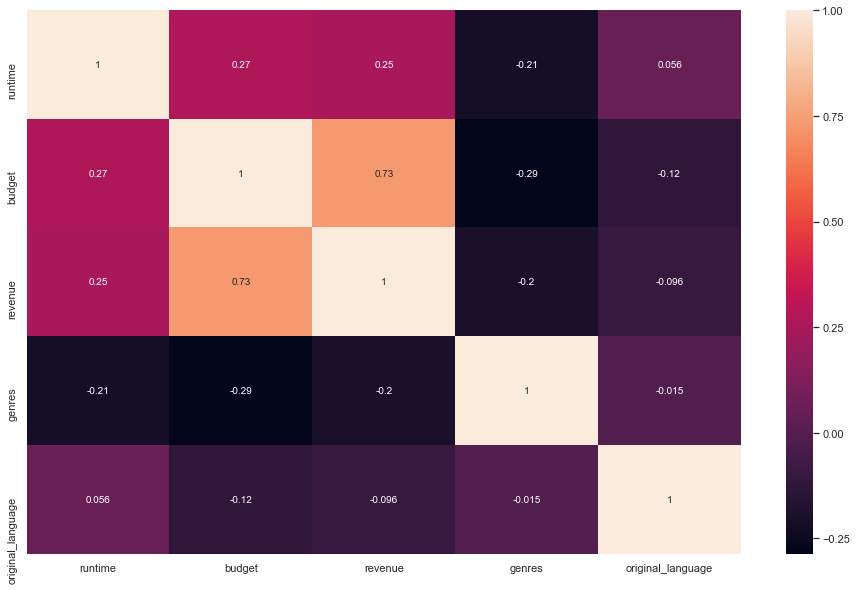

In [150]:
mv3.corr()

plt.figure(figsize =(16,10))
sns.heatmap(mv3.corr(), annot=True)
plt.show()

In [153]:
mv3 = mv3.drop('release_date', axis = 1)
mv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
runtime              4803 non-null int64
budget               4803 non-null int64
revenue              4803 non-null int64
genres               4803 non-null int32
original_language    4803 non-null int32
dtypes: int32(2), int64(3)
memory usage: 150.2 KB


## ## Split the data into training set and testing set using train_test_split
using scikit learn split the data-set

In [169]:
from sklearn.model_selection import train_test_split

In [154]:
# rearrranging columns for indepndent and dependent variable selection

mv3 = mv3[['runtime', 'budget', 'genres', 'original_language', 'revenue']]

In [173]:
# independent variables
X = mv3.iloc[:,[0,3]]

# dependent variables
y = mv3.iloc[:, 4]

In [174]:
# Using 70%-30% split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3362, 2)
Number transactions y_train dataset:  (3362,)
Number transactions X_test dataset:  (1441, 2)
Number transactions y_test dataset:  (1441,)


In [175]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
model.feature_importances_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

array([0.81017079, 0.18982921])

## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [176]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# independent variables
#X = mv3.iloc[:,[0,3]].values
# dependent variables
#y = mv3.iloc[:, 4].values


# apply SelectKBest to all features except DATE column.
topFeats = SelectKBest(score_func=chi2, k='all')
fit = topFeats.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

print(featureScores.nlargest(6,'Score'))

               Specs      Score
1  original_language  33308.969
0            runtime  14909.819


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.84616995 0.15383005]


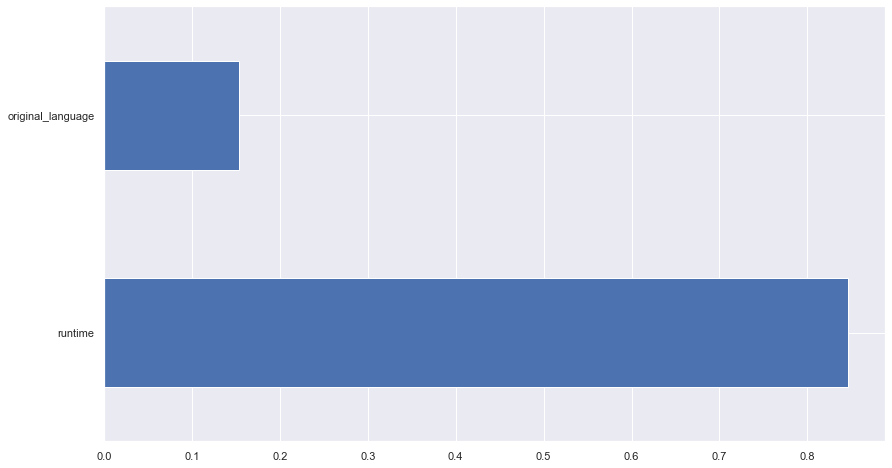

In [177]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [184]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[14909.819 33308.969]
[[162   1]
 [169   1]
 [148   1]
 [165   1]
 [132   1]]


### Building Model

In [192]:
# Fitting Decision Tree Classification to the Training set
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

### Assess Model 

In [194]:
# Predicting the Test set results
predictions = lm.predict(X)
print(predictions)

[1.882e+08 2.011e+08 1.624e+08 ... 1.107e+08 7.017e+07 5.542e+07]


### Model Assessment   

### Revised Parameter Settings  

# IV- Evaluation

###   Assessment of Data Analytics Results  
* ### Accuracy  
Accuracy is perhaps the most intuitive performance measure. It is simply the ratio of correctly predicted observations. Accuracy
is not shown in our output but you will see it used everywhere  

* ### Precision  
Precision looks at the ratio of correct positive observations  

* ### Recall  
Recall is also known as sensitivity or true positive rate. It is the ratio of correctly predicted positive events  

* ### F1 Score  
The F1 Score is the weighted average of Precision and recall. Therefore, this score takes both false postives and false negatives into account

In [195]:
# Making the Confusion Matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [206]:
lm.score(X,y)

0.07516872142087905

In [198]:
lm.coef_

array([ 1843887.388, -3003532.175])

In [199]:
lm.intercept_

-107523502.21901101

###  Review Process Review of Process  

###  Determine Next Steps   

###  List of Possible Actions Decision  

###  Review Recommendations to Organization